In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with sqlite3.connect("../laliga.sqlite") as conn:
    df = pd.read_sql("SELECT * FROM Matches", con = conn)

df = df.loc[-df.score.isnull()]


In [4]:
df.head(10)

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
5,1928-1929,1,2,2/17/29,None,Barcelona,Real Madrid,1:2
6,1928-1929,1,2,2/17/29,None,Athletic,Espanyol,9:0
7,1928-1929,1,2,2/17/29,None,Athletic Madrid,Donostia,0:3
8,1928-1929,1,2,2/17/29,None,Real Unión,Racing,3:1
9,1928-1929,1,2,2/17/29,None,Catalunya,Arenas Club,5:2


### Question 1:
Is it true that the home team is more likely to win? Make a pie chart showing the result distribution (whether home team wins, visitor team wins, or there's a tie) of all matches in the data. Write in the plot the percentage of each category.

In [45]:
def parse_score(score_as_string):
        if score_as_string is None: 
            return None
        home_goals, away_goals = score_as_string.split(":")
        home_goals = int(home_goals)
        away_goals = int(away_goals)
        if home_goals > away_goals: 
            return "1"
        if away_goals > home_goals: 
            return "2" 
        else: 
            return "X"
        

In [46]:
df['result'] = df['score'].apply(parse_score)

<AxesSubplot:title={'center':'Result distribution'}, ylabel='result'>

<AxesSubplot:title={'center':'Result distribution'}, ylabel='result'>

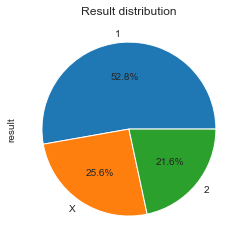

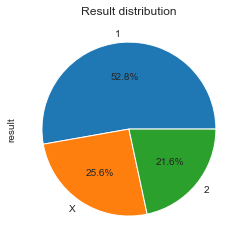

In [47]:
df["result"].value_counts().plot(kind="pie",title = "Result distribution",autopct='%1.1f%%')

### Question 2:
What are the top ten scoring teams of all time? What are the ten teams
that concede the most? Make two bar plot charts showing each of them.
Consider only matches played in 1st division.
What have been the biggest wins? Of course, when we say biggest we mean
those with the highest goal difference. Show the top ten of them in a table.


In [48]:
df[['home_goals','away_goals']] = df['score'].str.split(":",expand=True)
df = df.astype({"home_goals": int, "away_goals": int})

In [49]:
goals_by_team_home = df.groupby("home_team")["home_goals"].sum()
goals_by_team_away = df.groupby("away_team")["away_goals"].sum()
total_goals = goals_by_team_home + goals_by_team_away
top_scored_goals = total_goals.sort_values(ascending= False).head(10)


In [50]:
conceded_home = df.groupby("away_team")["home_goals"].sum()
conceded_away = df.groupby("home_team")["away_goals"].sum()
conceded_goals = conceded_home + conceded_away
top_conceded_goals = conceded_goals.sort_values(ascending= False).head(10)
top_conceded_goals.index

Index(['Espanyol', 'Athletic', 'Racing', 'Sevilla FC', 'Valencia',
       'Real Zaragoza', 'Celta de Vigo', 'Real Sociedad', 'Real Madrid',
       'Barcelona'],
      dtype='object', name='away_team')

Index(['Espanyol', 'Athletic', 'Racing', 'Sevilla FC', 'Valencia',
       'Real Zaragoza', 'Celta de Vigo', 'Real Sociedad', 'Real Madrid',
       'Barcelona'],
      dtype='object', name='away_team')

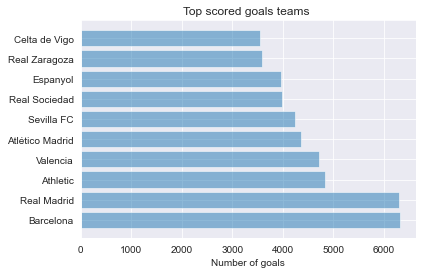

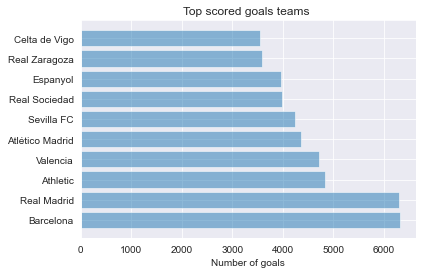

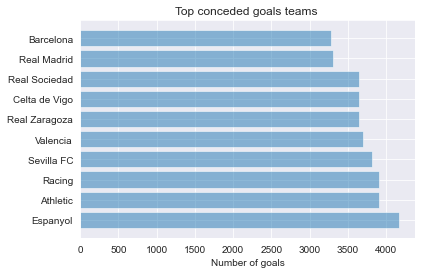

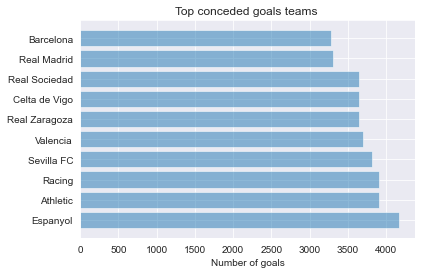

In [51]:
plt.barh(top_scored_goals.index, top_scored_goals, align='center', alpha=0.5)
plt.xlabel('Number of goals')
plt.title('Top scored goals teams ')
plt.show()

plt.barh(top_conceded_goals.index, top_conceded_goals, align='center', alpha=0.5)
plt.xlabel('Number of goals')
plt.title('Top conceded goals teams ')
plt.show()

In [52]:
df['Difference_goals'] = abs(df['home_goals'] - df['away_goals'])

In [53]:
df.loc[df['division']==1].sort_values('Difference_goals',ascending= False).head(10)

,season,division,matchday,date,time,home_team,away_team,score,result,home_goals,away_goals,Difference_goals
225,1930-1931,1,10,2/8/31,None,Athletic,Barcelona,12:1,1,12,1,11
936,1940-1941,1,1,9/29/40,None,Sevilla FC,Barcelona,11:1,1,11,1,10
1168,1941-1942,1,15,1/11/42,None,Athletic,Celta de Vigo,10:0,1,10,0,10
2787,1950-1951,1,11,11/19/50,None,Athletic,Lérida,10:0,1,10,0,10
1071,1941-1942,1,1,9/28/41,None,Sevilla FC,Real Oviedo,10:0,1,10,0,10
2574,1949-1950,1,8,10/23/49,None,Celta de Vigo,Gimnàstic,10:1,1,10,1,9
2771,1950-1951,1,9,11/5/50,None,Dep. La Coruña,Lérida,10:1,1,10,1,9
4745,1958-1959,1,15,12/28/58,None,Athletic,Real Gijón,9:0,1,9,0,9
2969,1951-1952,1,3,9/23/51,None,Athletic,Real Zaragoza,10:1,1,10,1,9
2537,1949-1950,1,2,9/11/49,None,Barcelona,Gimnàstic,10:1,1,10,1,9


,season,division,matchday,date,time,home_team,away_team,score,result,home_goals,away_goals,Difference_goals
225,1930-1931,1,10,2/8/31,None,Athletic,Barcelona,12:1,1,12,1,11
936,1940-1941,1,1,9/29/40,None,Sevilla FC,Barcelona,11:1,1,11,1,10
1168,1941-1942,1,15,1/11/42,None,Athletic,Celta de Vigo,10:0,1,10,0,10
2787,1950-1951,1,11,11/19/50,None,Athletic,Lérida,10:0,1,10,0,10
1071,1941-1942,1,1,9/28/41,None,Sevilla FC,Real Oviedo,10:0,1,10,0,10
2574,1949-1950,1,8,10/23/49,None,Celta de Vigo,Gimnàstic,10:1,1,10,1,9
2771,1950-1951,1,9,11/5/50,None,Dep. La Coruña,Lérida,10:1,1,10,1,9
4745,1958-1959,1,15,12/28/58,None,Athletic,Real Gijón,9:0,1,9,0,9
2969,1951-1952,1,3,9/23/51,None,Athletic,Real Zaragoza,10:1,1,10,1,9
2537,1949-1950,1,2,9/11/49,None,Barcelona,Gimnàstic,10:1,1,10,1,9


### Question 3:
There has been a lot of discussion about how LaLiga’s television rights have
changed game schedules in the last years. Make a bar plot chart showing
the number of matches played each weekday, and make also a histogram
of match time. Compare this two graphics between seasons 2000-2001 and
2020-2021.



In [54]:
def change_date_format(seasons,dates):
        years = seasons.split('-')
        date_split = dates.split('/')
        if date_split[2][-2:] == years[0][-2:]: 
            date_split[2] = years[0]
            return "/".join(date_split)
        else: 
            date_split[2] = years[1]
            return "/".join(date_split)
 

In [55]:
df['date'] = df.apply(lambda x: change_date_format(x['season'], x['date']), axis = 1) 

In [56]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()

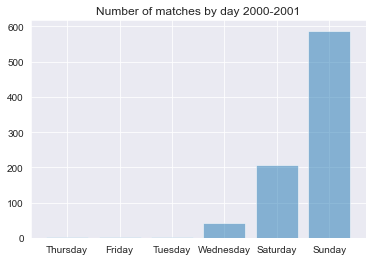

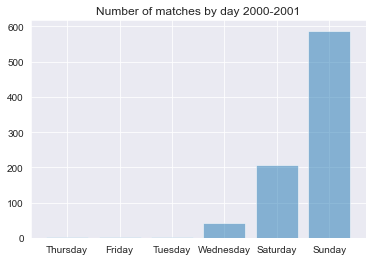

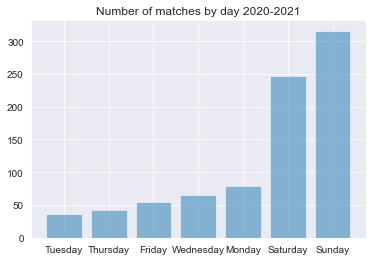

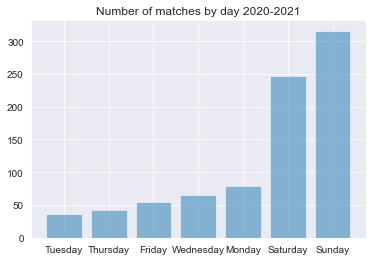

In [57]:
matchdays_2000_2001 = df.loc[df['season']=='2000-2001'].value_counts("day_of_week").sort_values()
matchdays_2020_2021 = df.loc[df['season']=='2020-2021'].value_counts("day_of_week").sort_values()


plt.bar(matchdays_2000_2001.index,matchdays_2000_2001 , align='center', alpha=0.5)
plt.title('Number of matches by day 2000-2001')
plt.show()

plt.bar(matchdays_2020_2021.index,matchdays_2020_2021 , align='center', alpha=0.5)
plt.title('Number of matches by day 2020-2021')
plt.show()

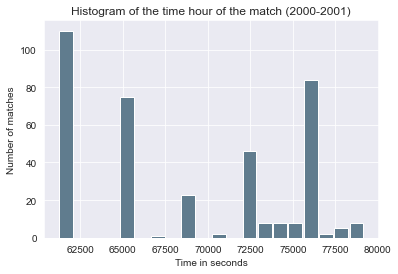

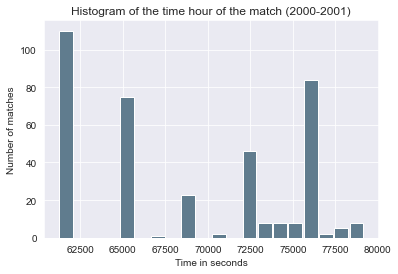

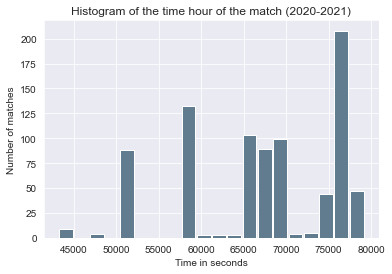

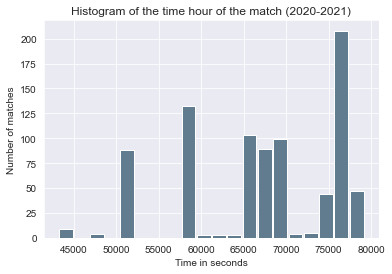

In [58]:
df['time_seconds'] = pd.to_datetime(df['time']).dt.time
df['time_seconds'] = pd.to_timedelta(df['time_seconds'].astype(str)).dt.total_seconds()

matchtime_2000_2001 = df.loc[df['season']=='2000-2001']
matchtime_2020_2021 = df.loc[df['season']=='2020-2021']


matchtime_2000_2001['time_seconds'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Histogram of the time hour of the match (2000-2001)')
plt.ylabel('Number of matches')
plt.xlabel('Time in seconds')
plt.show()

matchtime_2020_2021['time_seconds'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Histogram of the time hour of the match (2020-2021)')
plt.xlabel('Time in seconds')
plt.ylabel('Number of matches')
plt.show()

### Question 4:
Build a cross results table for season 2020-2021 (1st division). Figure 1 is an
example taken from Wikipedia. Try to make it the most similar to this one:
use team abbreviations as column names and paint the background of each
cell according to result (green in case local team wins and red in case visitor
team wins). Also, could you model the intensity of this background color
with the goal difference from the match?

Write a function that, given the season and division, plots the cross results table. Function prototype should be like plot_cross_results_table(season, division) and return the plot object.

In [59]:
def color_negative_red(result_as_string):
    reds = ['lightcoral','indianred','brown','firebrick','maroon','red']
    greens = ['palegreen','springgreen','mediumseagreen','seagreen','lime','darkgreen']
    if type(result_as_string) == float: 
        return 'black'
    else:
        val = int(result_as_string.split(":")[0]) - int(result_as_string.split(":")[1])
        if val < 0:
            if abs(val) > 6: 
                color = reds[5]
            else: 
                color = reds[abs(val)-1]
        if val > 0: 
            if abs(val) > 6: 
                color = greens[5]
            else: 
                color = greens[abs(val)-1]
        if val == 0: 
            color = 'gold'
        
        return 'background-color: %s' % color

def teams_abbreviations(teams):
    abbreviations = []
    for team in teams: 
        teams_array = team.split(" ")    
        if teams_array[0].isupper():
            abbreviations.append(teams_array[1][0:3].upper())
            continue
        if teams_array[0] == "Real":
            abbreviations.append("R"+teams_array[1][0:2].upper())
            continue
        else:
            abbreviations.append(teams_array[0][0:3].upper()) 
    return abbreviations

def cross_table_function(sel_season, df):
    teams = np.sort(df['home_team'].loc[(df['season'] == sel_season) & (df['division'] == 1)].unique())
    away_teams = teams_abbreviations(teams)
    table_cross = pd.DataFrame(np.zeros((20,20)), index = teams, columns= away_teams)
    for local in teams:
        for away, column_away in zip(teams, away_teams) :
            if local == away: 
                continue
            else:
                score = df['score'].loc[(df['season'] == sel_season) & (df['division'] == 1) & (df['away_team'] == away) & (df['home_team'] == local)]
                table_cross.loc[local, column_away] = score.values[0]                                        
    return table_cross  




sel_season = '2020-2021'
table = cross_table_function(sel_season, df)
table.style.applymap(color_negative_red)



#cross_table_differences(sel_season, df)


ValueError: Styles supplied as string must follow CSS rule formats, for example 'attr: val;'. 'black' was given.

ValueError: Styles supplied as string must follow CSS rule formats, for example 'attr: val;'. 'black' was given.

### Question 5: 
As you surely know, there has always been a historical rivalry between
Barcelona and Real Madrid. But which of them has won the most games
in direct confrontations? Which of them has scored the most goals in these
games? Show both things in two pie charts, side by side. Remember to consider ties in the first one.
Write a function that, given two team names, plots the two graphs described
above. Function prototype should be like plot_direct_confrontations_-
stats(team1, team2) and return the plot object. Use it with some other
classical rivals like Betis and Sevilla.

In [60]:
def number_of_wins_by_team(team1,team2,df):
    team1_win_as_local = len(df[(df['result'] == "1" ) & (df['away_team'] == team2) & (df['home_team'] == team1)])
    team2_win_as_local = len(df[(df['result'] == "1" ) & (df['away_team'] == team1) & (df['home_team'] == team2)])
    team1_lose_as_local = len(df[(df['result'] == "2" ) & (df['away_team'] == team2) & (df['home_team'] == team1)])
    team2_lose_as_local = len(df[(df['result'] == "2" ) & (df['away_team'] == team1) & (df['home_team'] == team2)])
    total_wins = np.array([team1_win_as_local + team2_lose_as_local, team2_win_as_local + team1_lose_as_local])
    return total_wins
def number_of_scores_by_team(team1,team2,df):
    team1_score_as_local = sum(df['home_goals'].loc[(df['away_team'] == team2) & (df['home_team'] == team1)])
    team2_score_as_local = sum(df['home_goals'].loc[(df['away_team'] == team1) & (df['home_team'] == team2)])
    team1_score_as_visitor = sum(df['away_goals'].loc[(df['away_team'] == team1) & (df['home_team'] == team2)])
    team2_score_as_visitor = sum(df['away_goals'].loc[(df['away_team'] == team2) & (df['home_team'] == team1)])
    total_scores = np.array([team1_score_as_local + team1_score_as_visitor, team2_score_as_local + team2_score_as_visitor]) 
    return total_scores

def plot_direct_congrontations_stats(team1, team2,df): 
    total_scores = number_of_scores_by_team(team1,team2,df)
    total_wins = number_of_wins_by_team(team1,team2,df)
    
    labels = [team1, team2]
    colors = ["#B22222","#696969"]
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.pie(total_wins, labels = labels, autopct='%1.1f%%', radius = 1.5,colors = colors ) 
    ax2.pie(total_scores, labels = labels, autopct='%1.1f%%', radius = 1.5,colors = colors ) 
    fig.tight_layout(pad=3.0)

    return ax1, ax2

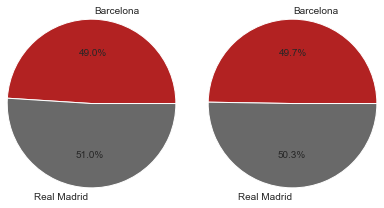

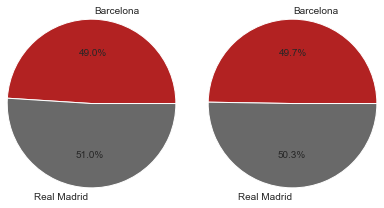

In [61]:
Barcelona_Madrid = plot_direct_congrontations_stats("Barcelona", "Real Madrid",df)
plt.show()

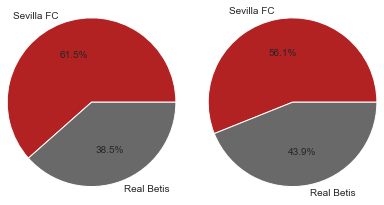

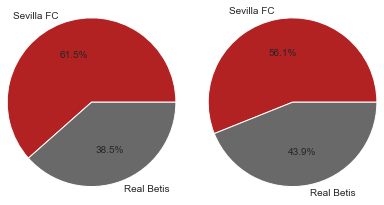

In [62]:
Sevilla_Betis = plot_direct_congrontations_stats("Sevilla FC", "Real Betis",df)
plt.show()

### Question 6: 
Between 1979 and 1980, Real Sociedad managed to chain a total of 38 games
without losing. That was, by far, the longest undefeated streak in their his-
tory. Which teams have had the longest undefeated streaks? Show the
longest undefeated streaks in a horizontal bar plot, indicating in each bar
the team name and the dates it held that streak, for instance, Real Sociedad
22/04/1979 - 04/05/1980.


In [63]:
def win_or_lose(home_team,away_team,result,team):
    if (home_team == team) & ((result == '1') | (result == 'X')):
        return 'Win'
    if (home_team != team) & ((result == '2') | (result == 'X')):
        return 'Win'
    else: 
        return 'Lose'

def get_value_of_comsum(dictionary,maximum):
    for key, value in dictionary.items():
        if maximum == value:
            return key

def get_streak(df,team):
    """
    this function returns 2 values from the dataframe df: 
    - maximum of games without losing. 
    - (the date when the streak sarts) - (The date when the streak ends).  
    """
    df_by_teams = df[(df['home_team'] == team) | (df['away_team'] == team)].copy().reset_index(drop=True)
    df_by_teams['win_lose'] = df_by_teams.apply(lambda x: win_or_lose(x['home_team'], x['away_team'], x['result'], team), axis = 1) 
    df_by_teams['previous_win_lose'] = df_by_teams['win_lose'].shift()
    df_by_teams["count_of_repeated"] = ((df_by_teams['win_lose'] != df_by_teams['previous_win_lose'])).cumsum()
    
    total_size = df_by_teams[df_by_teams['win_lose'] == 'Win'].groupby('count_of_repeated').size().to_dict()
    total_without_losing = df_by_teams[df_by_teams['win_lose'] == 'Win'].groupby('count_of_repeated').size().max()
    cumsum_size_max_value = get_value_of_comsum(total_size,total_without_losing)
    streak_begins = df_by_teams[df_by_teams['count_of_repeated'] == cumsum_size_max_value ].iloc[0]['date']
    streak_ends = df_by_teams[df_by_teams['count_of_repeated'] == cumsum_size_max_value ].iloc[-1]['date']
    period = str(streak_begins).split(" ")[0]+" - "+str(streak_ends).split(" ")[0]
    return [period,total_without_losing]

In [64]:
dataFrame_with_streaks = pd.DataFrame(columns = ['team','period_time', 'games_without_losing'])
teams = np.sort(df['home_team'].unique())
dataFrame_with_streaks['team'] = teams
dataFrame_with_streaks['period_time'] = dataFrame_with_streaks.apply(lambda x: get_streak(df,x['team'])[0], axis = 1)
dataFrame_with_streaks['games_without_losing'] = dataFrame_with_streaks.apply(lambda x: get_streak(df,x['team'])[1], axis = 1)

In [65]:
top_streaks = dataFrame_with_streaks.sort_values('games_without_losing', ascending = False).head(10)

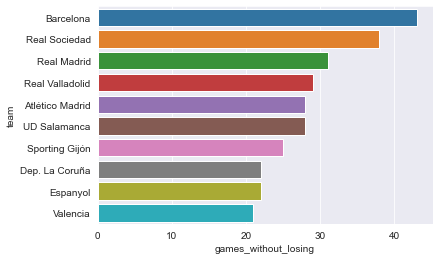

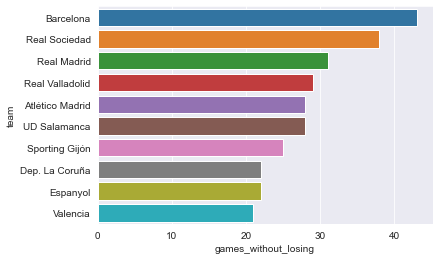

In [66]:
import seaborn as sns
# Set Seaborn style
sns.set_style('darkgrid')
sns.barplot(y = "team", x= "games_without_losing",data = top_streaks)
plt.show()

### Question 7:
Create a table with the final standings of each season (and division), that is, a table that contains all the teams ordered (in descending order) by the number of points they got during that season, and some other aggregate statistics. The table must contain the following columns: season, division, ranking, team, GF (total goals scored), GA (total goals conceded), GD (goals difference), W (total wins), L (total loses), T (total ties), Pts (points). Remember that, in football, you earn 3 points per victory, and 1 point per tie (none for loses). In case two teams have same number of points, order by GD (descending), and then by GF (also descending). Order the table so that standings of one season come before standings of previous one, and standings of 1st division come before standings of 2nd division.

In [67]:
# We collect the information from the point of view of the home team and the away team, then we put all together
df3 = df[['season','division','home_team','result','home_goals','away_goals']]
SeasonStanding = df3.groupby(['season','division','home_team']).agg(
    GF_home = ('home_goals', sum),
    GA_home = ('away_goals', sum),
    W = ('result', lambda x: x.eq('1').sum()),
    L = ('result', lambda x: x.eq('2').sum()),
    T = ('result', lambda x: x.eq('X').sum())

).reset_index()
SeasonStanding.rename({'home_team':'team'}, axis=1, inplace=True)
SeasonStanding.sort_values(['season','division','team'])

df3_1 = df[["season","division","away_team","result","home_goals","away_goals"]]
df3_1 = df3_1.groupby(["season",'division',"away_team"], as_index=False).agg(
    GF_away = ("away_goals", sum),
    GA_away = ("home_goals", sum),
    W_away = ('result', lambda x: x.eq('2').sum()),
    L_away = ('result', lambda x: x.eq('1').sum()),
    T_away = ('result', lambda x: x.eq('X').sum())
)
df3_1.sort_values(['season','division','away_team'])

SeasonStanding['GF_away'] = df3_1['GF_away']
SeasonStanding['GA_away'] = df3_1['GA_away']
SeasonStanding['W_away'] = df3_1['W_away']
SeasonStanding['L_away'] = df3_1['L_away']
SeasonStanding['T_away'] = df3_1['T_away']

# Creating all the features
SeasonStanding['W'] = SeasonStanding['W'] + SeasonStanding['W_away']
SeasonStanding['L'] = SeasonStanding['L'] + SeasonStanding['L_away']
SeasonStanding['T'] = SeasonStanding['T'] + SeasonStanding['T_away']
SeasonStanding['GF'] = SeasonStanding['GF_home'] + SeasonStanding['GF_away']
SeasonStanding['GA'] = SeasonStanding['GA_home'] + SeasonStanding['GA_away']
SeasonStanding['GD'] = SeasonStanding['GF'] - SeasonStanding['GA']
SeasonStanding = SeasonStanding.drop(['GF_home', 'GF_away', 'GA_home', 'GA_away', 'W_away', 'L_away', 'T_away'], axis=1)
SeasonStanding['Pts'] = 3*SeasonStanding['W'] + SeasonStanding['T']

# Creating the rank for each season
team_count = SeasonStanding.groupby(['season','division'])['team'].count().tolist()
rank_column = []
for i in team_count :
    j = list(range(1,i+1,1))
    rank_column += j

SeasonStanding = SeasonStanding.sort_values(['season','division', 'Pts', 'GD', 'GF'], ascending=[True,True, False, False, False])
SeasonStanding['rank'] = rank_column



In [68]:
import openpyxl

# Save as an excel file
SeasonStanding.to_excel(r'..\reports\SeasonStanding.xlsx', header=True)

In [69]:
SeasonStanding.loc[(SeasonStanding['season']=='2000-2001') & (SeasonStanding['division']==1)]

,season,division,team,W,L,T,GF,GA,GD,Pts,rank
1874,2000-2001,1,Real Madrid,24,6,8,81,40,41,80,1
1868,2000-2001,1,Dep. La Coruña,22,9,7,73,44,29,73,2
1871,2000-2001,1,RCD Mallorca,20,7,11,61,43,18,71,3
1864,2000-2001,1,Barcelona,17,9,12,80,57,23,63,4
1880,2000-2001,1,Valencia,18,11,9,55,34,21,63,5
1867,2000-2001,1,Celta de Vigo,16,11,11,51,49,2,59,6
1881,2000-2001,1,Villarreal,16,13,9,58,52,6,57,7
1870,2000-2001,1,Málaga CF,16,14,8,60,61,-1,56,8
1869,2000-2001,1,Espanyol,14,16,8,46,44,2,50,9
1862,2000-2001,1,Alavés,14,17,7,58,59,-1,49,10


,season,division,team,W,L,T,GF,GA,GD,Pts,rank
1874,2000-2001,1,Real Madrid,24,6,8,81,40,41,80,1
1868,2000-2001,1,Dep. La Coruña,22,9,7,73,44,29,73,2
1871,2000-2001,1,RCD Mallorca,20,7,11,61,43,18,71,3
1864,2000-2001,1,Barcelona,17,9,12,80,57,23,63,4
1880,2000-2001,1,Valencia,18,11,9,55,34,21,63,5
1867,2000-2001,1,Celta de Vigo,16,11,11,51,49,2,59,6
1881,2000-2001,1,Villarreal,16,13,9,58,52,6,57,7
1870,2000-2001,1,Málaga CF,16,14,8,60,61,-1,56,8
1869,2000-2001,1,Espanyol,14,16,8,46,44,2,50,9
1862,2000-2001,1,Alavés,14,17,7,58,59,-1,49,10


In [70]:
SeasonStanding.head(10)

,season,division,team,W,L,T,GF,GA,GD,Pts,rank
3,1928-1929,1,Barcelona,11,4,3,37,23,14,36,1
8,1928-1929,1,Real Madrid,11,6,1,40,27,13,34,2
1,1928-1929,1,Athletic,8,6,4,43,33,10,28,3
5,1928-1929,1,Donostia,8,6,4,46,41,5,28,4
0,1928-1929,1,Arenas Club,8,7,3,32,39,-7,27,5
2,1928-1929,1,Athletic Madrid,8,8,2,43,41,2,26,6
6,1928-1929,1,Espanyol,7,7,4,32,38,-6,25,7
4,1928-1929,1,Catalunya,6,8,4,45,49,-4,22,8
9,1928-1929,1,Real Unión,5,11,2,40,42,-2,17,9
7,1928-1929,1,Racing,3,12,3,25,50,-25,12,10


,season,division,team,W,L,T,GF,GA,GD,Pts,rank
3,1928-1929,1,Barcelona,11,4,3,37,23,14,36,1
8,1928-1929,1,Real Madrid,11,6,1,40,27,13,34,2
1,1928-1929,1,Athletic,8,6,4,43,33,10,28,3
5,1928-1929,1,Donostia,8,6,4,46,41,5,28,4
0,1928-1929,1,Arenas Club,8,7,3,32,39,-7,27,5
2,1928-1929,1,Athletic Madrid,8,8,2,43,41,2,26,6
6,1928-1929,1,Espanyol,7,7,4,32,38,-6,25,7
4,1928-1929,1,Catalunya,6,8,4,45,49,-4,22,8
9,1928-1929,1,Real Unión,5,11,2,40,42,-2,17,9
7,1928-1929,1,Racing,3,12,3,25,50,-25,12,10


### Question 8:
Villarreal is a team that has grown a lot in recent decades. Specially ever since some billionaire guy bought it (Fernando Roig, from Mercadona). Make a line plot showing the rank of Villarreal at the end of each season, from the oldest ones (left) to the earliest ones (right). Consider rankings in 2nd division to be a continuation of the 1st one, that is, if there’s N teams in 1st division and Villarreal got r position in 2nd division, then it should be placed in N + r. Draw in the same plot a line showing the cut between 1st and 2nd division.

Write a function that, given n team names, plots the graph described above of each one of them superposed. Function prototype should be like plot_- ranking_evolution(team1, team2, ..., teamN) and return the plot object (note that function should not take one array-type argument, but n arguments). Use it to compare the evolution of all Catalan teams in the data

([<matplotlib.axis.XTick at 0x24a2797f5e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([<matplotlib.axis.XTick at 0x24a2797f5e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

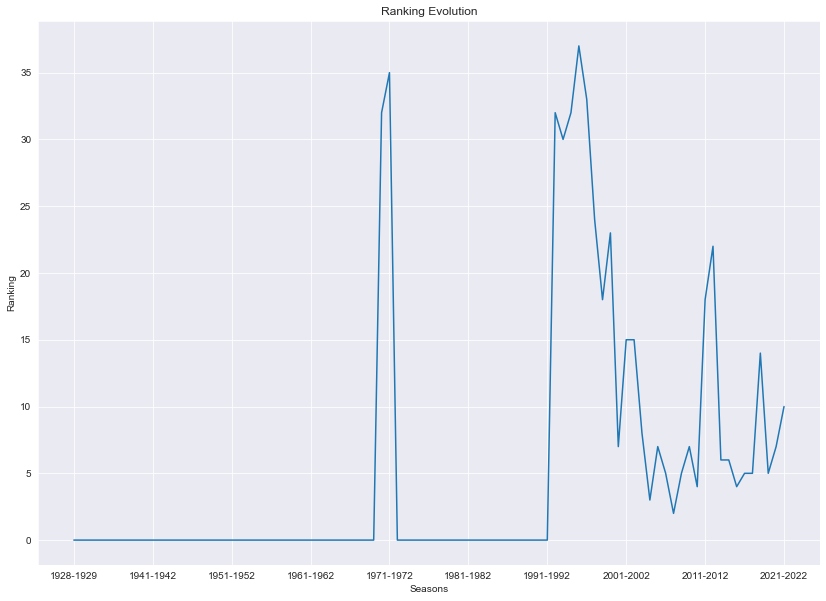

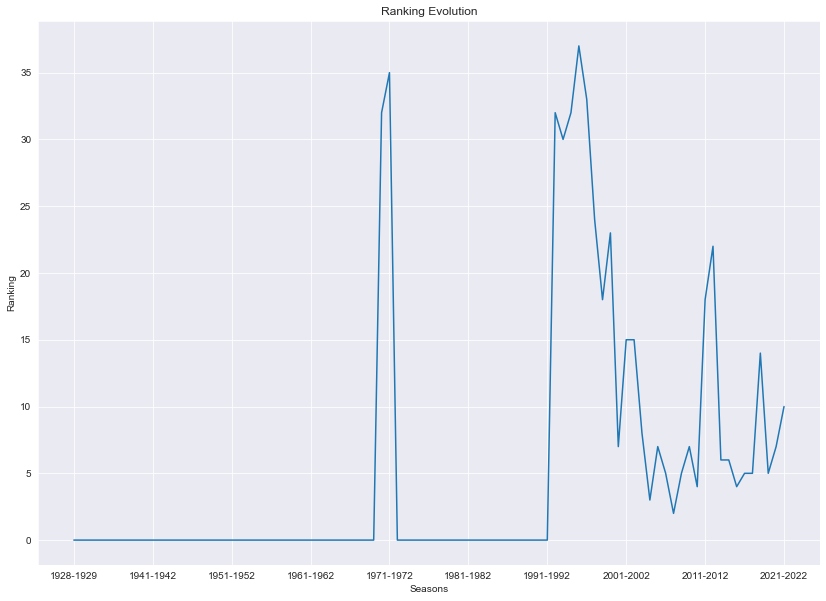

In [71]:
team = 'Villarreal' 
position = [0] * SeasonStanding['season'].unique()

# We will asume as position=0 if the team didn't played that season
for i, season in enumerate(SeasonStanding['season'].unique()):
    if(SeasonStanding['division'].loc[(SeasonStanding['season']==season) & (SeasonStanding['team']==team)].empty):
        position[i] = 0
    elif((SeasonStanding['division'].loc[(SeasonStanding['season']==season) & (SeasonStanding['team']==team)] == 2).any()):
        position[i] = SeasonStanding['rank'].loc[(SeasonStanding['season']==season) & (SeasonStanding['team']==team)] + \
        SeasonStanding['team'].loc[(SeasonStanding['season']==season) & (SeasonStanding['division']==1)].nunique()
    else:
        position[i] = SeasonStanding['rank'].loc[(SeasonStanding['season']==season) & (SeasonStanding['team']==team)]

# Making the plot
plt.figure(figsize=(14,10))
plt.plot(SeasonStanding['season'].unique(), position)
plt.xlabel('Seasons')  
plt.ylabel('Ranking')  
plt.title("Ranking Evolution")  
plt.xticks(np.arange(0, len(SeasonStanding['season'].unique()) + 1, 10)) # Don't show all x-labels

In [72]:
def plot_ranking_evolution(teams):
    positions = np.empty((len(teams),SeasonStanding['season'].nunique()))
    position = [0] * SeasonStanding['season'].unique()
    
    for j, team in enumerate(teams):
        for i, season in enumerate(SeasonStanding['season'].unique()):
            if(SeasonStanding['division'].loc[(SeasonStanding['season']==season) & (SeasonStanding['team']==team)].empty):
                position[i] = 0
            elif((SeasonStanding['division'].loc[(SeasonStanding['season']==season) & (SeasonStanding['team']==team)] == 2).any()):
                position[i] = SeasonStanding['rank'].loc[(SeasonStanding['season']==season) & (SeasonStanding['team']==team)] + \
                SeasonStanding['team'].loc[(SeasonStanding['season']==season) & (SeasonStanding['division']==1)].nunique()
            else:
                position[i] = SeasonStanding['rank'].loc[(SeasonStanding['season']==season) & (SeasonStanding['team']==team)]
        positions[j] = position
    
    # Making the plot
    plt.figure(figsize=(14,10))
    for j, team in enumerate(teams):
        plt.plot(SeasonStanding['season'].unique(), positions[j], label=team)

    plt.plot(SeasonStanding['season'].unique(), [20]*len(positions[0]), 'k.')
    plt.text(-3,21,'Second Division',bbox=dict(facecolor='red', alpha=0.5)) # We add a line that represents being in the second division
    plt.xlabel('Seasons')  
    plt.ylabel('Ranking') 
    plt.title("Ranking Evolution")  
    plt.xticks(np.arange(0, len(SeasonStanding['season'].unique()) + 1, 10))
    plt.legend()  
    plt.show()

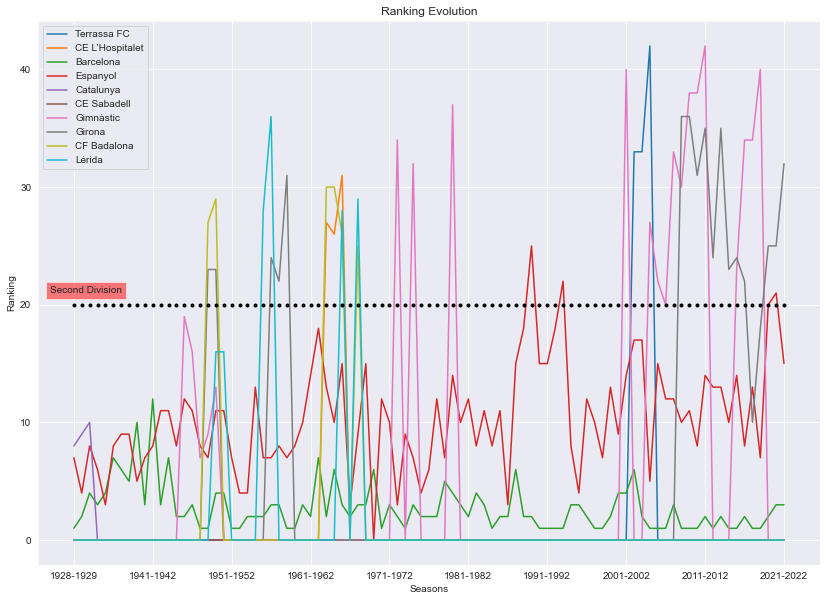

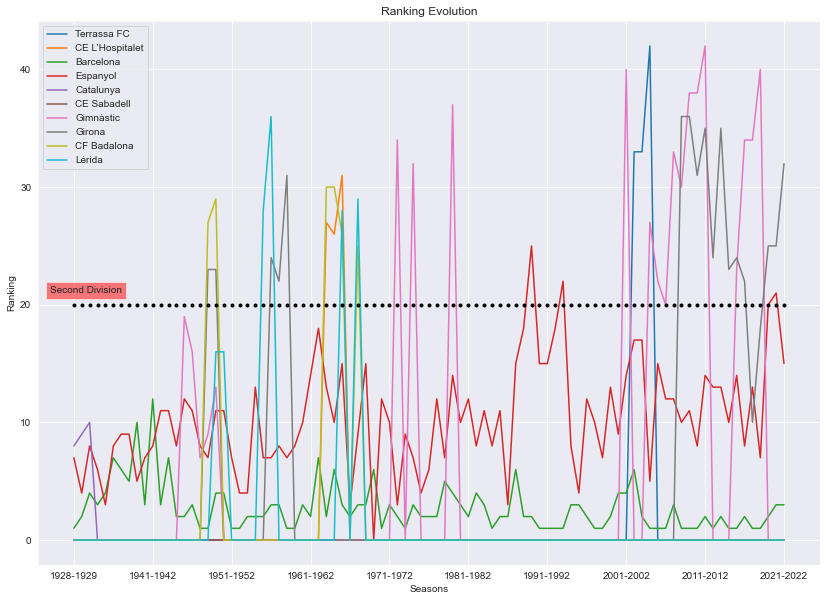

In [73]:
catalan_teams = ['Terrassa FC','CE L’Hospitalet','Barcelona','Espanyol','Catalunya','CE Sabadell','Gimnàstic','Girona','CF Badalona','Lérida']
plot_ranking_evolution(catalan_teams)

### Question 9:
In football jargon, those teams that are permanently descending and ascending between 1st and 2nd division are called elevator teams. What are the most elevator teams in LaLiga? Plot the history of the top 5 of them using the function from exercise 9.

In [74]:
teams = SeasonStanding['team'].unique()
seasons = SeasonStanding['season'].unique()
elevators = np.empty(SeasonStanding['team'].nunique())

for i, team in enumerate(teams): 
    elevator = 0
    # First we search for the seasons played
    divisions_not_played = []
    for j, season in enumerate(seasons):
        division_not_played = SeasonStanding['division'].loc[(SeasonStanding['team']==team) & (SeasonStanding['season']==season)]
        if(division_not_played.empty):
            divisions_not_played.append(j) 

    seasons_played = np.delete(seasons, divisions_not_played)    
    actual_division = SeasonStanding['division'].loc[(SeasonStanding['team']==team) & (SeasonStanding['season']==seasons_played[0])]
    actual_division = actual_division.item()
    seasons_played = np.delete(seasons_played, 0)
    
    # Now we calculate the elevators
    for season in seasons_played:
        division = SeasonStanding['division'].loc[(SeasonStanding['team']==team) & (SeasonStanding['season']==season)]
        division = division.item()
        if(division - actual_division != 0): # The division changed
            elevator += 1
            actual_division = division 
    elevators[i] = elevator

In [75]:
elevators_table = pd.DataFrame(SeasonStanding['team'].unique(), columns=['team'])
elevators_table['Nº of changes'] = elevators
elevators_table.sort_values('Nº of changes', ascending=False).head()

,team,Nº of changes
15,Dep. La Coruña,20.0
9,Racing,17.0
17,Celta de Vigo,17.0
65,Rayo Vallecano,15.0
27,Real Valladolid,14.0


,team,Nº of changes
15,Dep. La Coruña,20.0
9,Racing,17.0
17,Celta de Vigo,17.0
65,Rayo Vallecano,15.0
27,Real Valladolid,14.0


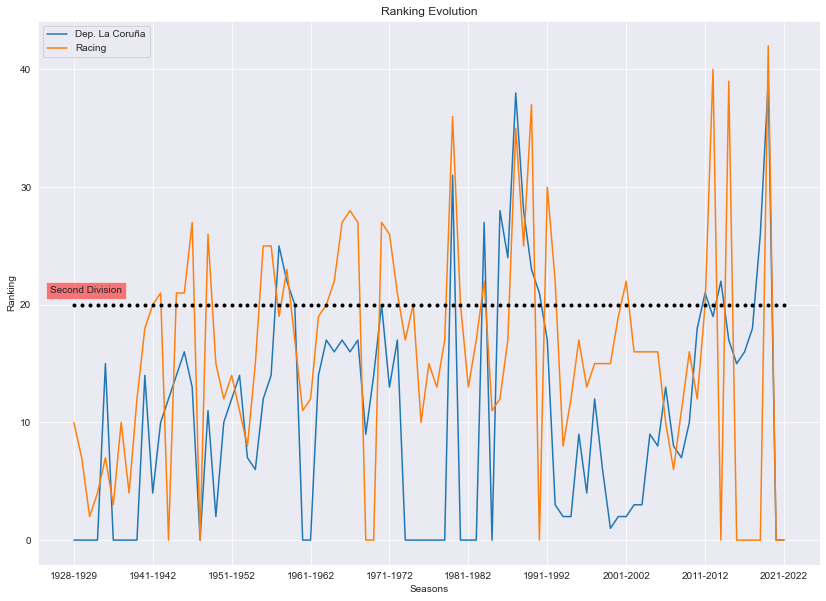

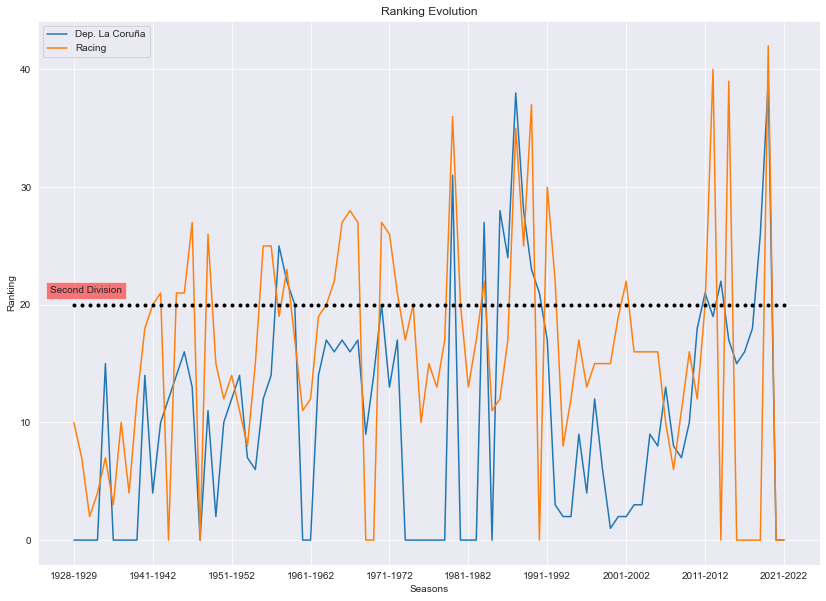

In [76]:
top_elevators_team = ['Dep. La Coruña','Racing','Celta de Vigo','Rayo Vallecano','Real Valladolid']
haha = ['Dep. La Coruña', 'Racing']
plot_ranking_evolution(haha)

### Question 10:
Create a table that is the same as the one in exercise 7, but not only with the season final standings, but the standings at the end of each matchday. Columns are the same, including matchday that tells about which matchday from the season these standings are from. Would you be able to add a new column last_5 with the result of last 5 matches? This column should
contain a list like ["W", "L", "W", "T", "T"]. In this list, the first item is the immediate previous match, the second one is the match before this one, and so on. If there are no 5 previous matches (because matchday < 6, for instance) then just make the list shorter.
Save the final table in Excel with the name MatchdayStandings.xlsx in the reports/ folder.

In [77]:
def isNaN(obj):
    return obj != obj

In [78]:
def last_results(row, row_1, row_2, row_3, row_4):
    if isNaN(row_1):
        return [row]
    elif isNaN(row_2):
        return [row, row_1]
    elif isNaN(row_3):
        return [row, row_1, row_2]
    elif isNaN(row_4):
        return [row, row_1, row_2, row_3]
    else:
        return [row,row_1,row_2,row_3,row_4]

In [79]:
def result(row):
    if row['W']==1:
        return 'W'
    elif row['L']==1:
        return 'L'
    elif row['T']==1:
        return 'T'
    else:
        return 'Fail'

In [ ]:
df4 = df[['season','division','home_team','result','matchday','home_goals','away_goals']]
MatchdayStanding = df4.groupby(['season','division','matchday','home_team']).agg(
    GF = ('home_goals', sum),
    GA = ('away_goals', sum),
    W = ('result', lambda x: x.eq('1').sum()),
    L = ('result', lambda x: x.eq('2').sum()),
    T = ('result', lambda x: x.eq('X').sum()),
).reset_index()
MatchdayStanding.rename({'home_team':'team'}, axis=1, inplace=True)
MatchdayStanding.sort_values(['season','division','team','matchday'])

df4_1 = df[["season","division","away_team","result",'matchday',"home_goals","away_goals"]]
df4_1 = df4_1.groupby(["season",'division','matchday',"away_team"], as_index=False).agg(
    GF = ("away_goals", sum),
    GA = ("home_goals", sum),
    W_away = ('result', lambda x: x.eq('2').sum()),
    L_away = ('result', lambda x: x.eq('1').sum()),
    T_away = ('result', lambda x: x.eq('X').sum())
)
df4_1.sort_values(['season','division','away_team','matchday'])
df4_1.rename({'away_team': 'team', 'W_away': 'W', 'L_away': 'L', 'T_away': 'T'}, axis=1, inplace=True) 

MatchdayStanding = MatchdayStanding.append(df4_1).sort_values(['season','division','matchday'])
MatchdayStanding.reset_index()
MatchdayStanding.sort_values(['season','division','matchday'])
MatchdayStanding.reset_index()
MatchdayStanding['result'] = MatchdayStanding.apply(lambda row: result(row), axis=1)

# Cummulative results
MatchdayStanding['GF'] = MatchdayStanding.groupby(["season",'division','team'], as_index=False)['GF'].cumsum()
MatchdayStanding['GA'] = MatchdayStanding.groupby(["season",'division','team'], as_index=False)['GA'].cumsum()
MatchdayStanding['W'] = MatchdayStanding.groupby(["season",'division','team'], as_index=False)['W'].cumsum()
MatchdayStanding['L'] = MatchdayStanding.groupby(["season",'division','team'], as_index=False)['L'].cumsum()
MatchdayStanding['T'] = MatchdayStanding.groupby(["season",'division','team'], as_index=False)['T'].cumsum()


MatchdayStanding['GD'] = MatchdayStanding['GF'] - MatchdayStanding['GA']
MatchdayStanding['Pts'] = 3*MatchdayStanding['W'] + MatchdayStanding['T']

# Raking by matchday
team_count = MatchdayStanding.groupby(['season','division','matchday'])['team'].count().tolist()
rank_column = []
for i in team_count :
    j = list(range(1,i+1,1))
    rank_column += j

MatchdayStanding = MatchdayStanding.sort_values(['season','division','matchday', 'Pts', 'GD', 'GF'], ascending=[True,True, True, False, False, False])
MatchdayStanding['rank'] = rank_column

# Shifted rows
MatchdayStanding = MatchdayStanding.sort_values(['season','division','team'], ascending=[True,True,True])
MatchdayStanding['result1'] = MatchdayStanding.groupby(['season','division','team'])['result'].shift()
MatchdayStanding['result2'] = MatchdayStanding.groupby(['season','division','team'])['result1'].shift()
MatchdayStanding['result3'] = MatchdayStanding.groupby(['season','division','team'])['result2'].shift()
MatchdayStanding['result4'] = MatchdayStanding.groupby(['season','division','team'])['result3'].shift()
MatchdayStanding['last_results'] = MatchdayStanding.apply(lambda row: last_results(row['result'],row['result1'],row['result2'],row['result3'],row['result4']), axis=1)

MatchdayStanding = MatchdayStanding.drop(['result','result1','result2','result3','result4'], axis=1)


In [ ]:
MatchdayStanding.head(50)           

,season,division,matchday,team,GF,GA,W,L,T,GD,Pts,rank,last_results
0,1928-1929,1,1,Arenas Club,2,3,0,1,0,-1,0,7,[L]
5,1928-1929,1,2,Arenas Club,4,8,0,2,0,-4,0,9,"[L, L]"
10,1928-1929,1,3,Arenas Club,5,9,0,2,1,-4,1,9,"[T, L, L]"
15,1928-1929,1,4,Arenas Club,7,11,0,2,2,-4,2,9,"[T, T, L, L]"
20,1928-1929,1,5,Arenas Club,8,11,1,2,2,-3,5,7,"[W, T, T, L, L]"
25,1928-1929,1,6,Arenas Club,11,11,2,2,2,0,8,7,"[W, W, T, T, L]"
30,1928-1929,1,7,Arenas Club,13,12,3,2,2,1,11,6,"[W, W, W, T, T]"
35,1928-1929,1,8,Arenas Club,16,14,4,2,2,2,14,4,"[W, W, W, W, T]"
40,1928-1929,1,9,Arenas Club,18,15,5,2,2,3,17,2,"[W, W, W, W, W]"
45,1928-1929,1,10,Arenas Club,20,16,6,2,2,4,20,2,"[W, W, W, W, W]"


In [ ]:
# Save as an excel file
MatchdayStanding.to_excel(r'..\reports\MatchdayStanding.xlsx', header=True)